In [1]:
import numpy as np
import cv2 as cv 
import helper as hlp
import skimage.io as io
import numpy.linalg as la
import matplotlib.pyplot as plt


Optimization terminated successfully.
         Current function value: 11.590446
         Iterations: 27
         Function evaluations: 5331


IndexError: list index out of range

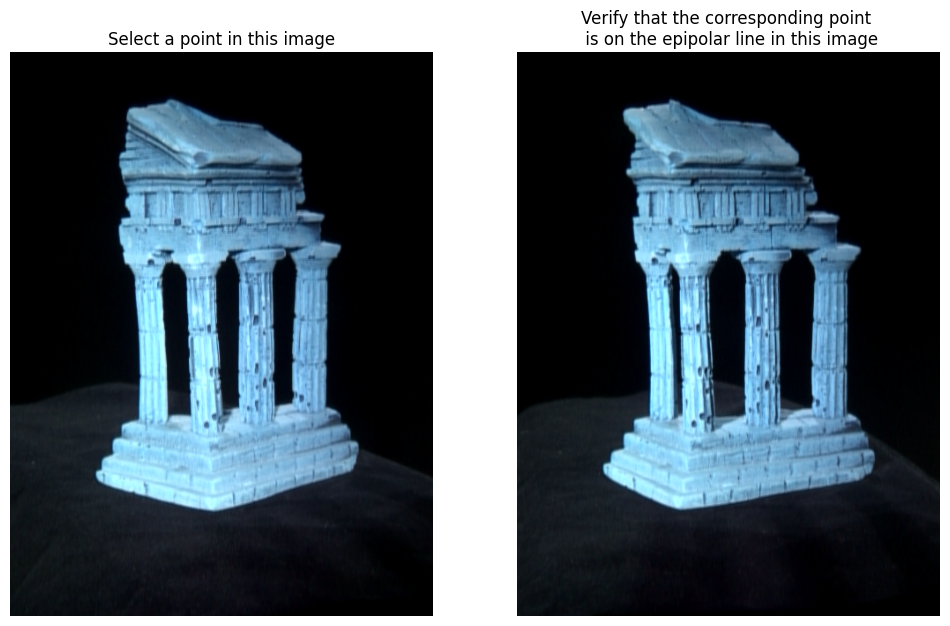

In [12]:
# Q1

class Q1:
    def __init__(self):

        """
        Write your own code here 

        Step 1. Load the two temple images and the points from data/some_corresp.npz
        im1, im2, pts

        Step 2. Run eight_point to compute F
        F = self.eight_point(pts1, pts2, M)

        """

        # DO NOT CHANGE HERE!
        self.im1 = cv.imread('../data/im1.png')
        self.im2 = cv.imread('../data/im2.png')
        data = np.load('../data/some_corresp.npz')

        pts1 = data['pts1']
        pts2 = data['pts2']
        M = max(self.im1.shape[0], self.im1.shape[1])

        self.F = self.eight_point(pts1, pts2, M)
            
    """
    Q1 Eight Point Algorithm
        [I] pts1, points in image 1 (Nx2 matrix)
            pts2, points in image 2 (Nx2 matrix)
            M, scalar value computed as max(H1,W1)
        [O] F, the fundamental matrix (3x3 matrix)
    """
    def eight_point(self, locs1, locs2, M):
        
        # Normalize points
        locs1_norm = locs1 / M
        locs2_norm = locs2 / M
        
        # Construct the A matrix
        A = np.column_stack([
            locs1_norm[:, 0] * locs2_norm[:, 0],
            locs1_norm[:, 0] * locs2_norm[:, 1],
            locs1_norm[:, 0],
            locs1_norm[:, 1] * locs2_norm[:, 0],
            locs1_norm[:, 1] * locs2_norm[:, 1],
            locs1_norm[:, 1],
            locs2_norm[:, 0],
            locs2_norm[:, 1],
            np.ones(locs1.shape[0])
        ])

        # Compute the singular value decomposition of A
        _, _, V = la.svd(A)

        # Extract the fundamental matrix from the last column of V
        F = V[-1].reshape((3, 3))

        # Enforce rank-2 constraint on F
        U, S, V = la.svd(F)
        S[-1] = 0
        F = U @ np.diag(S) @ V

        # Unnormalize F
        T = np.diag([1/M, 1/M, 1])
        F = T.T.dot(F).dot(T)

        F = hlp.refineF(F, locs1, locs2)

        return F


if __name__ == "__main__":

    Q1_instance = Q1()
    hlp.displayEpipolarF(Q1_instance.im1, Q1_instance.im2, Q1_instance.F)

